# prosper Loan Data Exploration
## by Shaymaa  Albzour


# Table of content   

- [Introduction](#intro)  
- [Preliminary Wrangling](#PreliminaryWrangling)
- [About Dataset](#AboutDataset)
- [Univariate Exploration](#UnivariateExploration)
  - [Count plot](#Countplot)  
  - [Bar chart](#Barchart)  
  - [Histogram](Histogram)
- [Bivariate Exploration](#BivariateExploration)  
  - [Scatter plot](#Scatterplot)
  - [Heat Map](#HeatMap)
  - [Box plot](#Boxplot)
- [Multivariate Exploration](#MultivariateExploration)
  - [Pair plot](#Pairplot)
  - [correlation matrix](#correlationmatrix)
  - [Facet Plot](#FacetPlot)
- [Conclusions](#Conclusions)

<a id=intro><a/>
## Introduction
In this project, we conducted a comprehensive exploratory data analysis (EDA) on a loan dataset to uncover valuable insights and patterns within the data. The primary objective was to gain a deep understanding of the various loan characteristics and their relationships, which can inform future decision-making processes and model development.

The EDA was divided into three main parts: univariate exploration, bivariate exploration, and multivariate exploration. Through these analyses, we aimed to identify key variables, understand their distributions, and examine the interdependencies between them. By leveraging visualization techniques, such as histograms, scatter plots, and correlation matrices, we were able to uncover significant findings.


<a id=AboutDataset></a>
## About Dataset
The loan dataset includes information on customers with varying loan repayment statuses. It contains data on customers who have fully paid off their loans, those who have been delinquent and sent to collections without completing repayment, as well as customers who have only paid off their loans after being sent to collections. The original dataset had 113,937 rows and 81 columns

| **Field Name**                    | **Description**                                                                                                                                                 |
|-----------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ListingKey                        | Unique key for each listing, same value as the 'key' used in the listing object in the API.                                                                      |
| ListingNumber                     | The number that uniquely identifies the listing to the public as displayed on the website.                                                                       |
| ListingCreationDate               | The date the listing was created.                                                                                                                                |
| CreditGrade                       | The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.    |
| Term                              | The length of the loan expressed in months.                                                                                                                      |
| LoanStatus                        | The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket. |
| ClosedDate                        | Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses.                                                                       |
| BorrowerAPR                       | The Borrower's Annual Percentage Rate (APR) for the loan.                                                                                                        |
| BorrowerRate                      | The Borrower's interest rate for this loan.                                                                                                                      |
| LenderYield                       | The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.                                                     |
| EstimatedEffectiveYield           | Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees. Applicable for loans originated after July 2009. |
| EstimatedLoss                     | Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.                                                  |
| EstimatedReturn                   | The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009. |
| ProsperRating (numeric)           | The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009. |
| ProsperRating (Alpha)             | The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.                                 |
| ProsperScore                      | A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009. |
| ListingCategory                   | The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans |
| BorrowerState                     | The two-letter abbreviation of the state of the address of the borrower at the time the Listing was created.                                                      |
| Occupation                        | The Occupation selected by the Borrower at the time they created the listing.                                                                                     |
| EmploymentStatus                  | The employment status of the borrower at the time they posted the listing.                                                                                       |
| EmploymentStatusDuration          | The length in months of the employment status at the time the listing was created.                                                                                |
| IsBorrowerHomeowner               | A Borrower will be classified as a homeowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.           |
| CurrentlyInGroup                  | Specifies whether or not the Borrower was in a group at the time the listing was created.                                                                         |
| GroupKey                          | The Key of the group in which the Borrower is a member of. Value will be null if the borrower does not have a group affiliation.                                  |
| DateCreditPulled                  | The date the credit profile was pulled.                                                                                                                          |
| CreditScoreRangeLower             | The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.                                             |
| CreditScoreRangeUpper             | The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.                                             |
| FirstRecordedCreditLine           | The date the first credit line was opened.                                                                                                                       |
| CurrentCreditLines                | Number of current credit lines at the time the credit profile was pulled.                                                                                         |
| OpenCreditLines                   | Number of open credit lines at the time the credit profile was pulled.                                                                                           |
| TotalCreditLinespast7years        | Number of credit lines in the past seven years at the time the credit profile was pulled.                                                                         |
| OpenRevolvingAccounts             | Number of open revolving accounts at the time the credit profile was pulled.                                                                                     |
| OpenRevolvingMonthlyPayment       | Monthly payment on revolving accounts at the time the credit profile was pulled.                                                                                 |
| InquiriesLast6Months              | Number of inquiries in the past six months at the time the credit profile was pulled.                                                                             |
| TotalInquiries                    | Total number of inquiries at the time the credit profile was pulled.                                                                                             |
| CurrentDelinquencies              | Number of accounts delinquent at the time the credit profile was pulled.                                                                                         |
| AmountDelinquent                  | Dollars delinquent at the time the credit profile was pulled.                                                                                                    |
| DelinquenciesLast7Years           | Number of delinquencies in the past 7 years at the time the credit profile was pulled.                                                                           |
| PublicRecordsLast10Years          | Number of public records in the past 10 years at the time the credit profile was pulled.                                                                         |
| PublicRecordsLast12Months         | Number of public records in the past 12 months at the time the credit profile was pulled.                                                                        |
| RevolvingCreditBalance            | Dollars of revolving credit at the time the credit profile was pulled.                                                                                           |
| BankcardUtilization               | The percentage of available revolving credit that is utilized at the time the credit profile was pulled.                                                         |
| AvailableBankcardCredit           | The total available credit via bank card at the time the credit profile was pulled.                                                                              |
| TotalTrades                       | Number of trade lines ever opened at the time the credit profile was pulled.                                                                                     |
| TradesNeverDelinquent             | Number of trades that have never been delinquent at the time the credit profile was pulled.                                                                      |
| TradesOpenedLast6Months           | Number of trades opened in the last 6 months at the time the credit profile was pulled.                                                                          |
| DebtToIncomeRatio                 | The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%). |
| IncomeRange                       | The income range of the borrower at the time the listing was created.                                                                                            |
| IncomeVerifiable                  | The borrower indicated they have the required documentation to support their income.                                                                             |
| StatedMonthlyIncome               | The monthly income the borrower stated at the time the listing was created.                                                                                      |
| LoanKey                           | Unique key for each loan. This is the same key that is used in the API.                                                                                          |
| TotalProsperLoans                 | Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.                          |
| TotalProsperPaymentsBilled        | Number of on time payments the borrower made on Prosper loans at the time they created this listing. This value will be null if the borrower had no prior loans.  |
| OnTimeProsperPayments             | Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans. |
| ProsperPaymentsLessThanOneMonthLate | Number of payments the borrower made on Prosper loans that were less than one month late at the time they created this listing. This value will be null if the borrower had no prior loans. |
| ProsperPaymentsOneMonthPlusLate   | Number of payments the borrower made on Prosper loans that were greater than one month late at the time they created this listing. This value will be null if the borrower had no prior loans. |
| ProsperPrincipalBorrowed          | Total principal borrowed on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.                      |
| ProsperPrincipalOutstanding       | Principal outstanding on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.                         |
| ScorexChangeAtTimeOfListing       | Borrower's credit score change at the time the credit profile was pulled. This will be the change relative to the borrower's last Prosper loan. This value will be null if the borrower had no prior loans. |
| LoanCurrentDaysDelinquent         | The number of days delinquent.                                                                                                                                  |
| LoanFirstDefaultedCycleNumber     | The cycle the loan was charged off. If the loan has not charged off the value will be null
| LoanMonthsSinceOrigination        | Number of months since the loan originated.                                                                                                                      |
| LoanNumber                        | Unique numeric value associated with the loan.                                                                                                                   |
| LoanOriginalAmount                | The origination amount of the loan.                                                                                                                              |
| LoanOriginationDate               | The date the loan was originated.                                                                                                                                |
| LoanOriginationQuarter            | The quarter in which the loan was originated.                                                                                                                    |
| MemberKey                         | The unique key that is associated with the borrower. This is the same identifier that is used in the API member object.                                          |
| MonthlyLoanPayment                | The scheduled monthly loan payment.                                                                                                                              |
| LP_CustomerPayments               | Pre charge-off cumulative gross payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.                   |
| LP_CustomerPrincipalPayments      | Pre charge-off cumulative principal payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.               |
| LP_InterestandFees                | Pre charge-off cumulative interest and fees paid by the borrower. If the loan has charged off, this value will exclude any recoveries.                            |
| LP_ServiceFees                    | Cumulative service fees paid by the investors who have invested in the loan.                                                                                      |
| LP_CollectionFees                 | Cumulative collection fees paid by the investors who have invested in the loan.                                                                                   |
| LP_GrossPrincipalLoss             | The gross charged off amount of the loan.                                                                                                                         |
| LP_NetPrincipalLoss               | The principal that remains uncollected after any recoveries.                                                                                                      |
| LP_NonPrincipalRecoverypayments   | The interest and fee component of any recovery payments. The current payment policy applies payments in the following order: Fees, interest, principal.           |
| PercentFunded                     | Percent the listing was funded.                                                                                                                                  |
| Recommendations                   | Number of recommendations the borrower had at the time the listing was created.                                                                                  |
| InvestmentFromFriendsCount        | Number of friends that made an investment in the loan.                                                                                                           |
| InvestmentFromFriendsAmount       | Dollar amount of investments that were made by friends.                                                                                                          |
| Investors                         | The number of investors that funded the loan.                                                                                                                    |


<a id=PreliminaryWrangling><a/>
## Preliminary Wrangling

In [2]:
# import needed packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


In [3]:
df= pd.read_csv('C:\\Users\\user\\Downloads\\prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
print(df.dtypes.to_string())

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [6]:
df['ListingCreationDate'].value_counts()

ListingCreationDate
2013-10-02 17:20:16.550000000    6
2013-08-28 20:31:41.107000000    4
2013-09-08 09:27:44.853000000    4
2013-12-06 11:44:58.283000000    4
2013-12-06 05:43:13.830000000    4
                                ..
2013-12-20 16:29:35.667000000    1
2008-06-03 17:40:16.807000000    1
2007-04-25 11:06:01.370000000    1
2012-05-01 07:18:05.273000000    1
2014-01-15 09:27:37.657000000    1
Name: count, Length: 113064, dtype: int64

In [7]:
# Remove the time part from the ListingCreationDate column
df['ListingCreationDate'] = df['ListingCreationDate'].str.split(' ').str[0]

In [8]:
# Convert data types
df['ListingCreationDate'] = df['ListingCreationDate'].astype("datetime64[ns]")


In [9]:
df['ProsperPaymentsLessThanOneMonthLate'].isnull().sum()

91852

In [10]:
df.dropna(subset=['OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
                  'ProsperPrincipalBorrowed','ScorexChangeAtTimeOfListing','LoanOriginationDate','LP_ServiceFees',
                  'LP_CollectionFees','LP_GrossPrincipalLoss','LP_NonPrincipalRecoverypayments','MemberKey','LoanNumber','Recommendations',])

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
16,0F4835843081468212F0892,841846,2013-07-16,NaN,60,Current,NaN,0.30748,0.2809,0.2709,...,-23.01,0.0,0.0,0.0,0.0,1.0,0,0,0.00,8
33,0F6B3496936961316AEE1B2,478891,2010-10-10,NaN,36,Completed,2012-12-21 00:00:00,0.08191,0.0785,0.0685,...,-196.82,0.0,0.0,0.0,0.0,1.0,0,0,0.00,326
46,0F8B34281015537050D4FEC,378497,2008-08-05,C,36,Completed,2010-01-29 00:00:00,0.17170,0.1500,0.1400,...,-44.51,0.0,0.0,0.0,0.0,1.0,2,1,789.59,103
47,0F8B3577039176552F6CC26,765126,2013-05-01,NaN,36,Current,NaN,0.15833,0.1299,0.1199,...,-99.94,0.0,0.0,0.0,0.0,1.0,1,0,0.00,1
54,0FBC3556025226720BE6DD4,629058,2012-08-26,NaN,60,Current,NaN,0.20931,0.1852,0.1752,...,-244.02,0.0,0.0,0.0,0.0,1.0,0,0,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113927,E3433419834735803891976,322787,2008-04-30,AA,36,Completed,2011-05-09 00:00:00,0.07469,0.0679,0.0579,...,-68.47,0.0,0.0,0.0,0.0,1.0,2,0,0.00,194
113928,E34935176664905343E01EA,510097,2011-06-06,NaN,36,Completed,2011-09-19 00:00:00,0.22362,0.1899,0.1799,...,-4.41,0.0,0.0,0.0,0.0,1.0,0,0,0.00,25
113930,E35D3584034795373BCD69A,831523,2013-07-08,NaN,36,Current,NaN,0.20053,0.1639,0.1539,...,-16.51,0.0,0.0,0.0,0.0,1.0,0,0,0.00,52
113933,E6DB353036033497292EE43,537216,2011-11-03,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.00,22


In [11]:
# Extract the year and create a new column
df['LoanOriginationYear'] = df['LoanOriginationQuarter'].apply(lambda x: int(x.split()[1]))

# Display the DataFrame to verify the new column
print(df[['LoanOriginationQuarter', 'LoanOriginationYear']])

       LoanOriginationQuarter  LoanOriginationYear
0                     Q3 2007                 2007
1                     Q1 2014                 2014
2                     Q1 2007                 2007
3                     Q4 2012                 2012
4                     Q3 2013                 2013
...                       ...                  ...
113932                Q2 2013                 2013
113933                Q4 2011                 2011
113934                Q4 2013                 2013
113935                Q4 2011                 2011
113936                Q1 2014                 2014

[113937 rows x 2 columns]


In [12]:
def extract_year_and_quarter(df, column_name):
    """
    Extracts year and quarter from the specified column in the DataFrame and adds two new columns.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column containing the 'Quarter Year' information.
    
    Returns:
    pd.DataFrame: The DataFrame with new 'LoanOriginationYear' column.
    """
    df['LoanOriginationYear'] = df[column_name].apply(lambda x: int(x.split()[1]))
    return df

In [13]:
# Call the function and update the DataFrame
df = extract_year_and_quarter(df, 'LoanOriginationQuarter')

In [14]:
def get_year(quarter_string):
    """
    Extract the year from a string in the format 'Q3 2007'.
    """
    year_part = quarter_string.split()[1]
    return int(year_part)

# Apply the function to the "LoanOriginationQuarter" column and create a new column
df['Loan_Year'] = df['LoanOriginationQuarter'].apply(get_year)

In [15]:
df['Loan_Year']

0         2007
1         2014
2         2007
3         2012
4         2013
          ... 
113932    2013
113933    2011
113934    2013
113935    2011
113936    2014
Name: Loan_Year, Length: 113937, dtype: int64

In [16]:
import pandas as pd

def get_date(date_string):
    """
    Extract the date from a string in the format '2001-10-11 00:00:00'.
    """
    # Convert the date string to a datetime object
    date = pd.to_datetime(date_string, format='%Y-%m-%d %H:%M:%S')
    return date

# Apply the function to the "LoanOriginationQuarter" column and create a new column
df['FirstRecordedCreditLineDate'] = df['FirstRecordedCreditLine'].apply(get_date)

In [17]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanOriginationYear,Loan_Year,FirstRecordedCreditLineDate
0,1021339766868145413AB3B,193129,2007-08-26,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,1.0,0,0,0.0,258,2007,2007,2001-10-11
1,10273602499503308B223C1,1209647,2014-02-27,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,1.0,0,0,0.0,1,2014,2014,1996-03-18
2,0EE9337825851032864889A,81716,2007-01-05,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,1.0,0,0,0.0,41,2007,2007,2002-07-27
3,0EF5356002482715299901A,658116,2012-10-22,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,1.0,0,0,0.0,158,2012,2012,1983-02-28
4,0F023589499656230C5E3E2,909464,2013-09-14,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,1.0,0,0,0.0,20,2013,2013,2004-02-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,0.0,0.0,1.0,0,0,0.0,1,2013,2013,1997-09-01
113933,E6DB353036033497292EE43,537216,2011-11-03,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,0.0,0.0,1.0,0,0,0.0,22,2011,2011,1992-01-17
113934,E6E13596170052029692BB1,1069178,2013-12-13,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,0.0,0.0,1.0,0,0,0.0,119,2013,2013,2002-02-25
113935,E6EB3531504622671970D9E,539056,2011-11-14,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,0.0,0.0,1.0,0,0,0.0,274,2011,2011,1993-12-01


In [18]:
## drop unnescesary columns 

In [19]:
df = df.drop(columns=['LoanOriginationDate', 'FirstRecordedCreditLine'])

In [20]:
# descriptive statistics for numeric variables
print(df.describe())

       ListingNumber            ListingCreationDate           Term  \
count   1.139370e+05                         113937  113937.000000   
mean    6.278857e+05  2011-07-08 19:07:19.727217408      40.830248   
min     4.000000e+00            2005-11-09 00:00:00      12.000000   
25%     4.009190e+05            2008-09-19 00:00:00      36.000000   
50%     6.005540e+05            2012-06-16 00:00:00      36.000000   
75%     8.926340e+05            2013-09-09 00:00:00      36.000000   
max     1.255725e+06            2014-03-10 00:00:00      60.000000   
std     3.280762e+05                            NaN      10.436212   

         BorrowerAPR   BorrowerRate    LenderYield  EstimatedEffectiveYield  \
count  113912.000000  113937.000000  113937.000000             84853.000000   
mean        0.218828       0.192764       0.182701                 0.168661   
min         0.006530       0.000000      -0.010000                -0.182700   
25%         0.156290       0.134000       0.124200   

#### **Dataset Structure, Key Features, and Supporting Variables**

*Number of Loans:*   
The dataset contains 113,937 individual loan records.    
*Number of Variables:*     
Each loan record has 81 variables or attributes associated with it.  

The primary features of interest are the key variables that are central to your investigation, such as Loan Original Amount, LP_CustomerPrincipalPayments, MonthlyLoanPayment, Debt-to-Income Ratio, Stated Monthly Income, Employment Status, and Income Range. These are the core variables that you have identified as being crucial for understanding the loan portfolio dynamics. The supportive features, on the other hand, are additional variables in the dataset that can provide supplementary information to enhance your analysis of the primary features. Examples of supportive features include location, occupation, homeownership status, Investors, and EstimatedReturn. These supportive features complement the primary features, allowing to uncover deeper relationships and interactions within the data, identify influential factors that drive the behavior of the primary features, improve the predictive power and accuracy of your models, and discover hidden patterns and segmentation within the loan dataset. By using both the primary features and the supportive features together,This develop a more holistic and informed analysis of the loan portfolio.

<a id= UnivariateExploration><a/>
## Univariate Exploration

***Question**: What is the distribution of income verifiability among the dataset?*

<a id= Countplot><a/>
### <u>Count plot<u/>

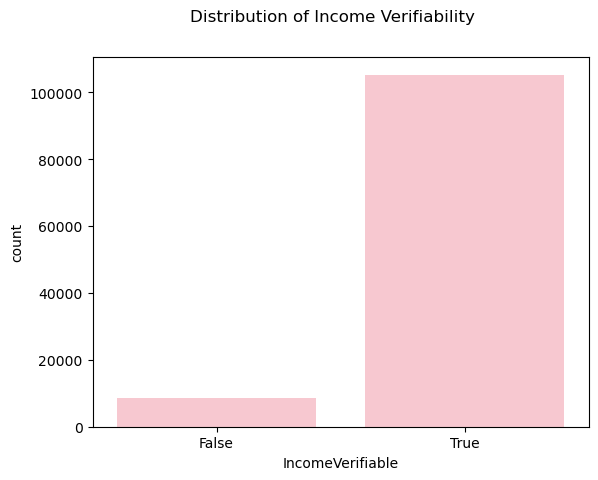

In [21]:
# Calculate the counts for each category
IncomeVerifiable_counts = df['IncomeVerifiable'].value_counts()

# Get the categories in order from lowest to highest count
order = IncomeVerifiable_counts.sort_values().index

# Plotting with the determined order
sns.countplot(data=df, x='IncomeVerifiable', color='pink', order=order);
plt.suptitle("Distribution of Income Verifiability");

This count plot shows the **counts of a categorical variable (IncomeVerifiable)** with two categories: True and False.  
The True category has a significantly higher count than the False category. This indicates that most of the entries in the dataset have verifiable income.The count for True is approximately over 100,000, whereas the count for False is considerably lower, likely under 20,000.

***Question**: How does the distribution of loan applicants differ across various employment status categories?*

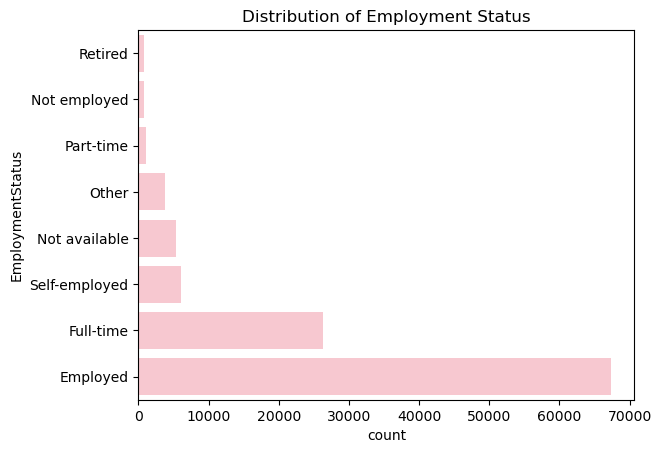

In [22]:
# Calculate the counts for each category
EmploymentStatus_counts = df['EmploymentStatus'].value_counts()

# Get the categories in order from lowest to highest count
order = EmploymentStatus_counts.sort_values().index

# Add a title
plt.title("Distribution of Employment Status")

# Plotting with the determined order
sns.countplot(data=df, y='EmploymentStatus', color='pink', order=order);

<a id=Barchart><a/>
### <u>Bar chart<u/>

***Question**: What is the distribution of loan amounts in the dataset, and are there any notable patterns or trends?*

In [23]:
df['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

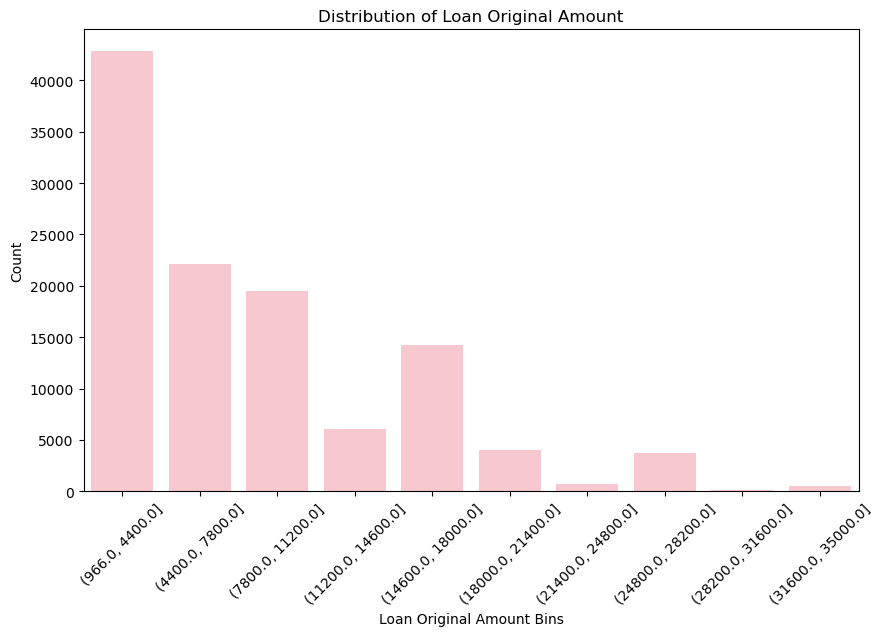

In [24]:
# Bin the numeric data
bins = pd.cut(df['LoanOriginalAmount'], bins=10) 

# Calculate the counts for each bin
bin_counts = bins.value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=bin_counts.index.astype(str), y=bin_counts.values, color='pink')
plt.xlabel('Loan Original Amount Bins')
plt.ylabel('Count')
plt.title('Distribution of Loan Original Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


The bar plot shows the **distribution of the Loan Original Amount variable**, which is binned into intervals.  
The distribution of loan amounts is highly right-skewed, with the majority of the loans falling into the lower amount bins. This suggests that lower loan amounts are much more common in the dataset.

<a id=Histogram><a/>
### <u>Histogram<u/>

***Quastion:** What is the distribution of customer principal payments, and are there any notable patterns or outliers?*

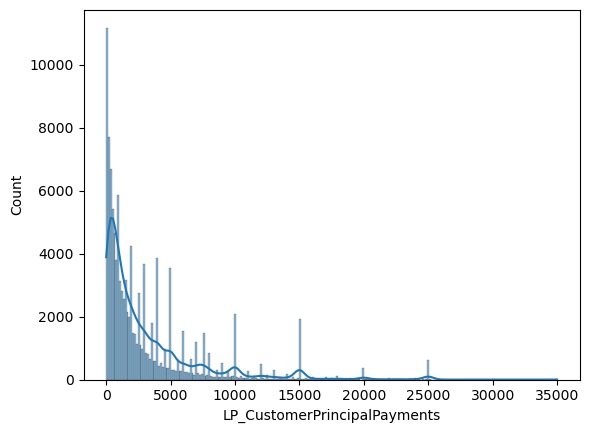

In [25]:
sns.histplot(data=df, x='LP_CustomerPrincipalPayments', kde=True);

The plot displays a right-skewed **distribution of the "LP_CustomerPrincipalPayments" variable.**   
This skewed shape suggests the presence of some customer principal payment values that are significantly different than the bulk of the data points, indicating the possibility of outliers.
The KDE curve provides a smoothed representation of the underlying distribution.

**Transformation :**

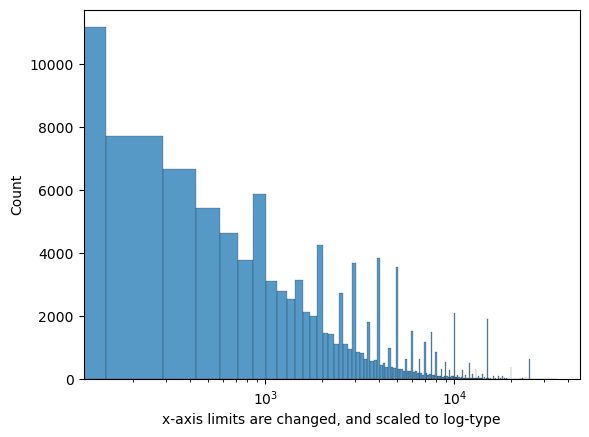

In [26]:
## Axis transformation
sns.histplot(data=df, x='LP_CustomerPrincipalPayments');

plt.xscale('log')

## Apply x-axis label
plt.xlabel('x-axis limits are changed, and scaled to log-type');

In [27]:
df['LP_CustomerPrincipalPayments'].describe()

count    113937.000000
mean       3105.536588
std        4069.527670
min           0.000000
25%         500.890000
50%        1587.500000
75%        4000.000000
max       35000.000000
Name: LP_CustomerPrincipalPayments, dtype: float64

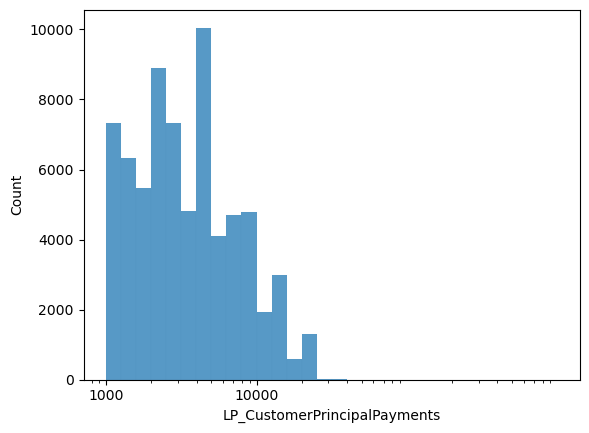

In [28]:
## Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(3, 6+0.1, 0.1)

## Generate the x-ticks you want to apply
ticks = [1000, 10000]

## Convert ticks into string values, to be displaye dlong the x-axis
labels = [f'{v}' for v in ticks]

## Plot the histogram
sns.histplot(data=df, x='LP_CustomerPrincipalPayments', bins=bins);

## The argument in the xscale() represents the axis scale type to apply.

plt.xscale('log')

## Apply x-ticks
plt.xticks(ticks, labels);

> The plot after Transformation :

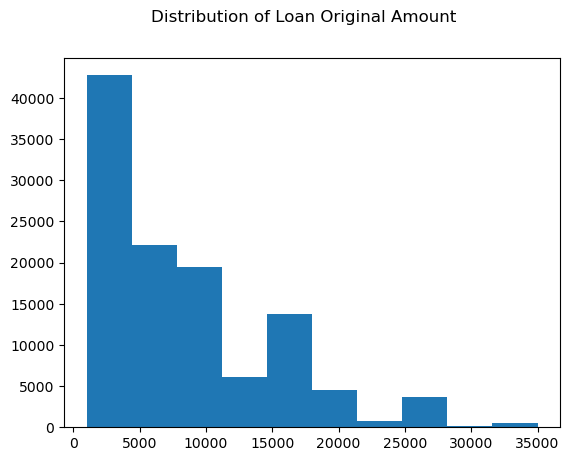

In [29]:
plt.hist(data=df, x='LoanOriginalAmount');
plt.suptitle("Distribution of Loan Original Amount");

This histogram provides a **visual representation of the distribution of loan original amounts**, which could be useful for understanding the characteristics of the loan portfolio and potentially identifying any trends or anomalies.  
While most loans fall within the 0 to 20,000 range, there are a few outliers with larger original amounts, up to around 35,000.

The distribution appears to be highly right-skewed, with a long tail towards the higher values.   
The plot reveals a few extremely high values that stand out as outliers, significantly higher than the majority of the data points. These outliers can have a significant impact on the overall distribution and may warrant further investigation.

#### **Exploring Data Distribution: A Closer Look**

 >IncomeVerifiable is a categorical variable with a skewed distribution - most entries have "True" income verification.  
Loan Original Amount and LP_CustomerPrincipalPayments are continuous variables with highly right-skewed distributions, indicating most values are lower. There are some outlier high values.  
The skewed distributions and outliers may require transformations, such as log-transformations, to better model the data for subsequent analyses.
In general.  


<a id=BivariateExploration><a/>
## Bivariate Exploration

<a id=Scatterplot><a/>
### <u>Scatter plot</u>

 ***Quastion** :How does the original loan amount influence the monthly payment for borrowers, and is there a consistent proportional relationship between the two variables across different loan sizes?* 

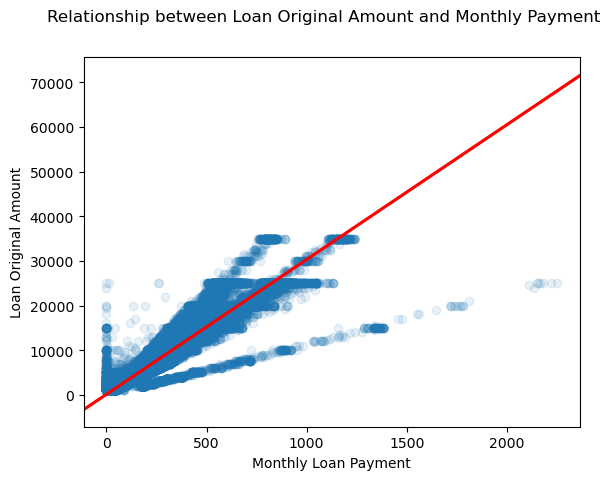

In [30]:
#two numaric variabels 

# Create a scatter plot with a regression line
sns.regplot(data=df, x='MonthlyLoanPayment', y='LoanOriginalAmount',line_kws={'color': 'red'},truncate=False, x_jitter=0.9, scatter_kws={'alpha':1/10});
plt.suptitle("Relationship between Loan Original Amount and Monthly Payment")
# Label axes
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Loan Original Amount');

Scatter plot shows a **positive relationship between the monthly loan payment and the original loan amount.**

<a id=HeatMap><a/>
### <u>Heat Map<u/>

***Question**:How are the monthly loan payments and original loan amounts distributed and related to each other in the dataset?*

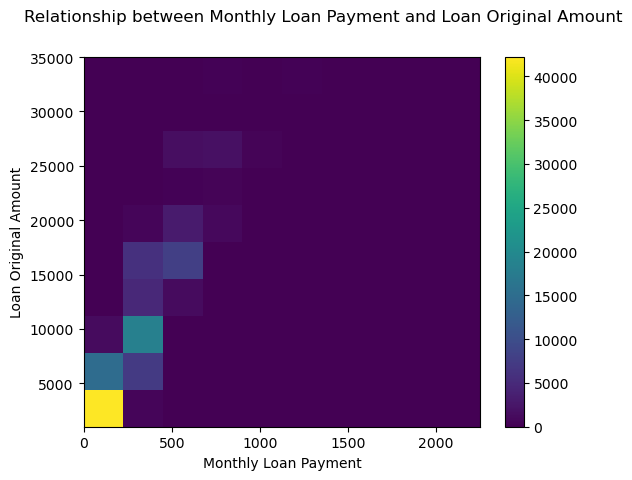

In [31]:
# two discreate variabels 

# Create a 2D histogram of Monthly Loan Payment vs. Loan Original Amount
plt.hist2d(data=df, x='MonthlyLoanPayment', y='LoanOriginalAmount')

# Add a color bar to indicate the density of points
plt.colorbar()

# Add the title as a subtitle
plt.suptitle("Relationship between Monthly Loan Payment and Loan Original Amount")

# Label axes
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Loan Original Amount');

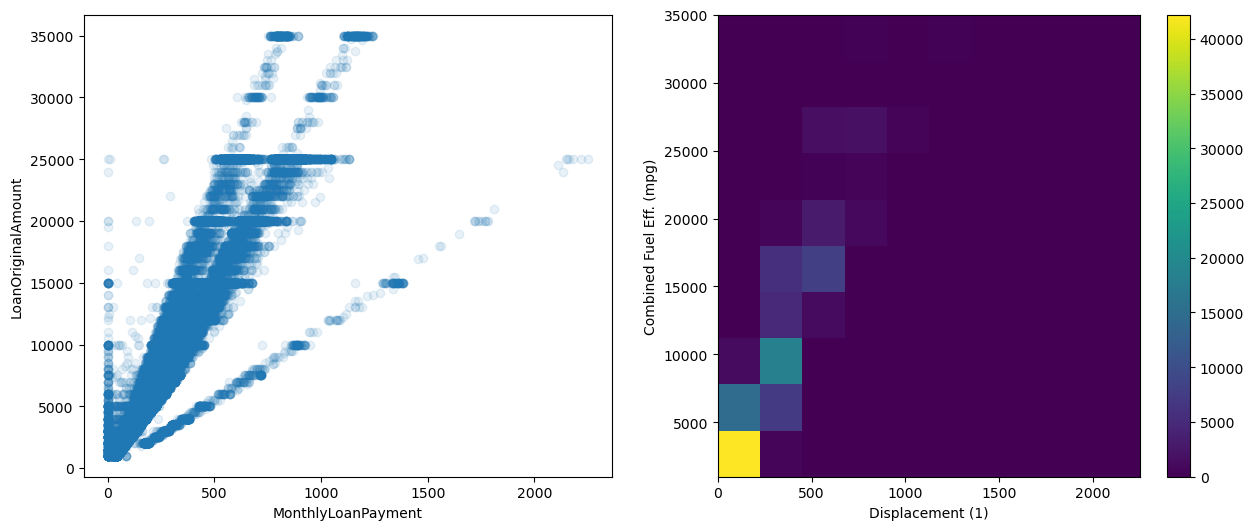

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# PLOT ON LEFT: SEABORN
sns.regplot(data =df, x='MonthlyLoanPayment', y='LoanOriginalAmount', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False, ax=ax1)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT: PYPLOT
plt.subplot(1, 2, 2)
plt.hist2d(data=df,x='MonthlyLoanPayment', y='LoanOriginalAmount')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

**The heatmap** provides a useful visualization of the distribution of monthly loan payments and their relationship with the original loan amounts.  
The heatmap suggests that there is a positive relationship between the original loan amount and the monthly loan payment, as the higher monthly payments are generally associated with the higher original loan amounts.  
**The scatter plot** shows a clear **positive linear relationship between the Monthly Loan Payment and the Loan Original Amount**. As the monthly loan payment increases, the corresponding loan original amount also increases.  
The plot reveals several outliers, particularly at the higher end of the monthly loan payment and loan original amount. 

<a id=Boxplot><a/>
### <u>Box plot<u/>

***Question**:How does the Loan Original Amount vary across different loan status categories?*

In [33]:
df['LoanStatus'].value_counts()

LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

Text(0, 0.5, 'Loan Original Amount')

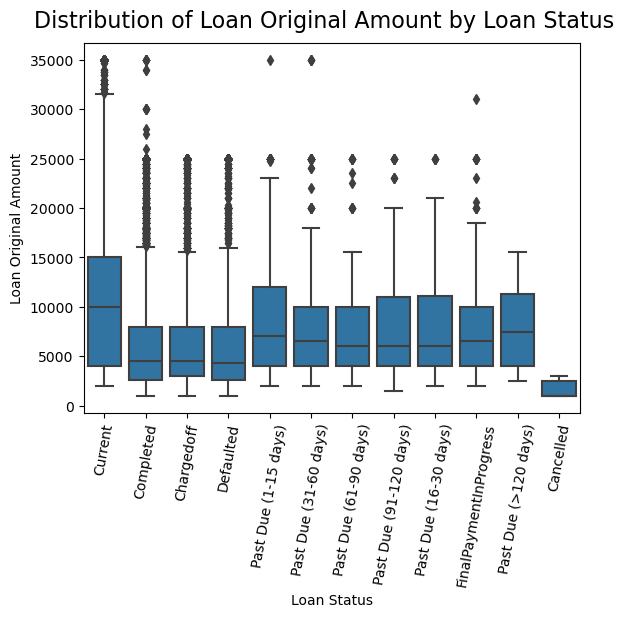

In [34]:
# Types of loan status
loan_status_classes = ['Current', 'Completed', 'Chargedoff', 'Defaulted','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)','Cancelled']

# Returns the types for loan_status_classes with the categories and orderedness
loan_status_dtype = pd.CategoricalDtype(ordered=True, categories=loan_status_classes)

# Use pandas.astype() to convert the "Loan_Status" column from a plain object type into an ordered categorical type 
df['LoanStatus'] = df['LoanStatus'].astype(loan_status_dtype)

ax1 = sns.boxplot(data=df, x='LoanStatus', y='LoanOriginalAmount', color='tab:blue')
plt.xticks(rotation=80)
plt.ylim(ax1.get_ylim());



# Add a title and axis labels
plt.suptitle('Distribution of Loan Original Amount by Loan Status', fontsize=16, y=0.95)
plt.xlabel('Loan Status')
plt.ylabel('Loan Original Amount')

The plot displays **the distribution of loan original amounts across different loan status categories**. This allows for an understanding of how the loan amounts vary among loans with different statuses.  
The box plots indicate the spread of the loan original amounts within each loan status category.exhibit a wider range of loan amounts compared to others. Additionally, there are several outliers present, particularly in the higher loan amount categories.

#### <u>**Uncovering Patterns: Relationships within the Data**</u>

The analysis found a strong positive relationship between loan amount and monthly payment, but outliers suggest additional factors influence the payment. Visualizations confirmed these findings and identified variations in loan amounts based on loan status.
The presence of outliers suggests that other factors could influence the variable of interest(LoanStatus).

<a id=MultivariateExploration><a/>
## Multivariate Exploration

<a id=Pairplot><a/>
### <u>Pair plot</u>

***Question**: How do the key loan variables, such as Loan Original Amount, Customer Principal Payments, Monthly Loan Payment, Debt-to-Income Ratio, and Stated Monthly Income, relate to each other, and how do these relationships vary across different loan status categories?*

In [35]:
key_vars=['LoanOriginalAmount', 'LP_CustomerPrincipalPayments',
       'MonthlyLoanPayment', 'DebtToIncomeRatio', 'StatedMonthlyIncome']

In [36]:
## this list is the natural order of loan status
loan_status_order = [ 'Completed','FinalPaymentInProgress','Current', 'Past Due','Chargedoff','Defaulted']

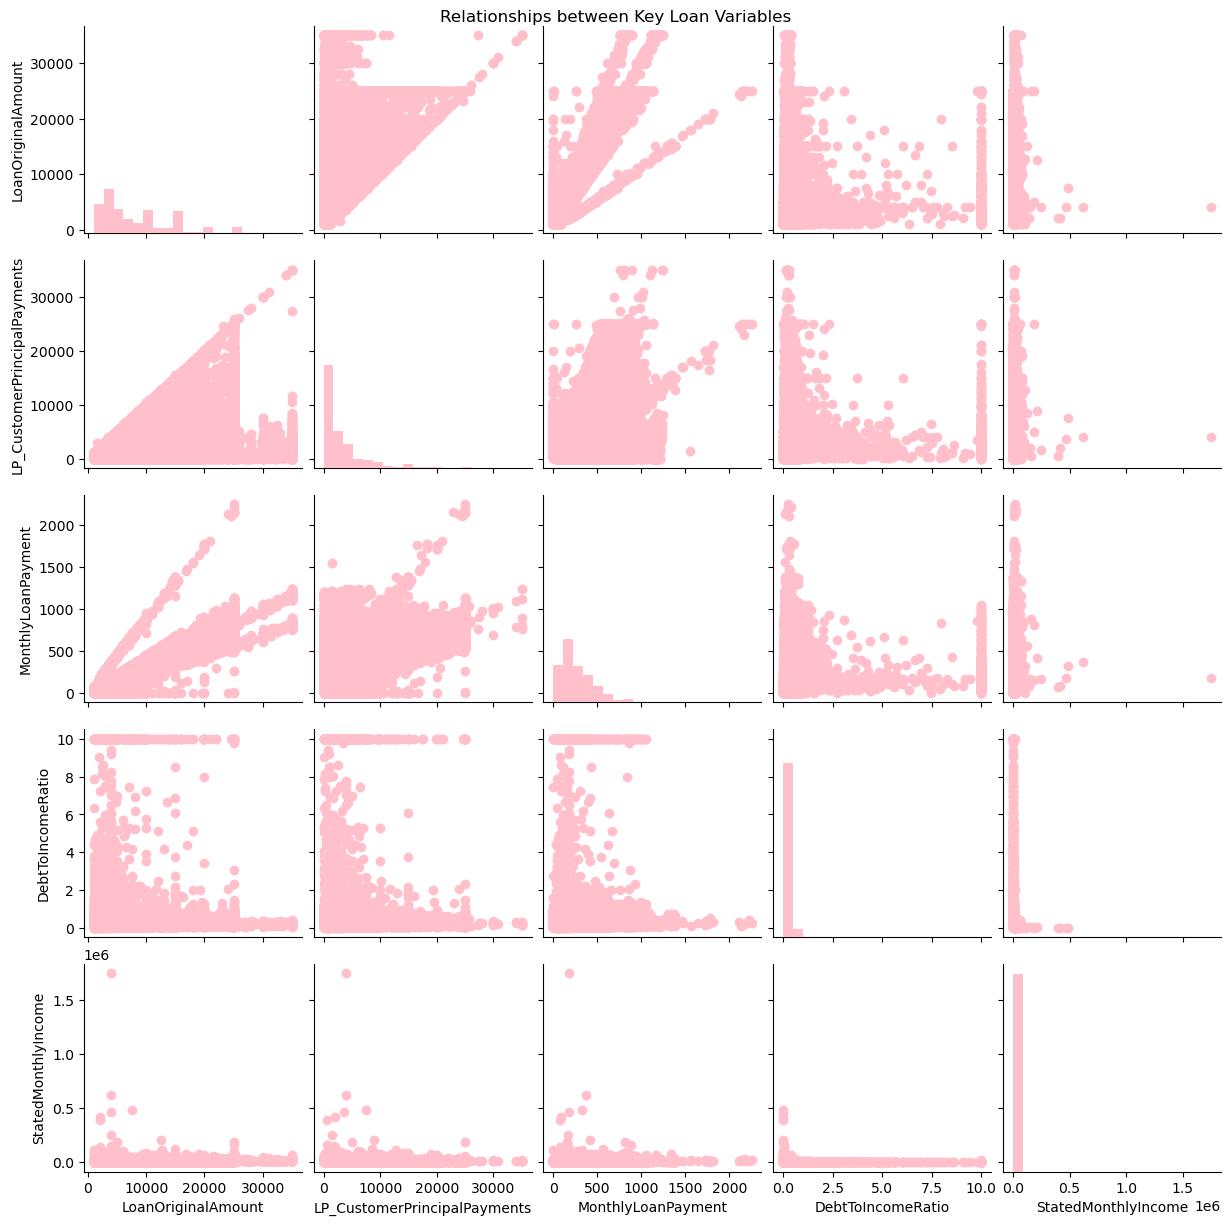

In [37]:
grid = sns.PairGrid(data = df, vars = key_vars )
grid.map_diag(plt.hist, bins = 20,color='pink')
grid.map_offdiag(plt.scatter,color='pink')
grid.fig.suptitle("Relationships between Key Loan Variables")
grid.tight_layout();

- The scatter plots in the off-diagonal cells will show a mix of positive and negative associations between the loan variables.
- Loan Original Amount has a positive relationship with both LP_CustomerPrincipalPayments and MonthlyLoanPayment. 
This indicates that as the Loan Original Amount increases, the Customer Principal Payments and Monthly Loan Payment also tend to increase.
MonthlyLoanPayment also has a positive relationship with LP_CustomerPrincipalPayments.
This suggests that higher Monthly Loan Payments are associated with higher Customer Principal Payments.  
- Debt-to-Income Ratio and Stated Monthly Income appear to have negative relationships with almost all the other loan variables.  
- It highlights the presence of outliers across multiple variables, which could have a significant impact on the analysis.  
Outliers are observed in the scatter plots for Loan Original Amount, LP_CustomerPrincipalPayments, MonthlyLoanPayment, and Debt-to-Income Ratio.
These outliers represent data points that deviate significantly from the main clusters or patterns of the other observations.



  .

<a id=correlationmatrix><a/>
### <u> correlation matrix </u>

***Question**: What are the correlations between the key loan variables, and how strong are these relationships?*

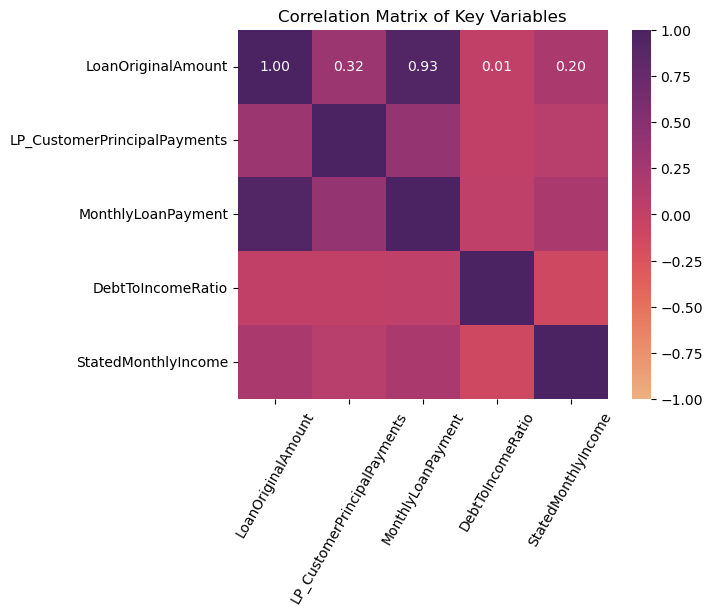

In [38]:
sns.heatmap(df[key_vars].corr(), cmap='flare', annot=True,
          fmt='.2f', vmin=-1, square=True);
plt.xticks(rotation = 60)

# Add a title
plt.title("Correlation Matrix of Key Variables");


The matrix displays the pairwise correlation coefficients between all the included loan variables.  
- The intersection of the "LoanOriginalAmount" row and the "MonthlyLoanPayment" column shows a dark purple color.This indicates that the correlation coefficient between these two variables is very close to 1.0, which represents a strong positive relationship(As the Loan Original Amount increases, the Monthly Loan Payment also tends to increase).
- The Debt-to-Income Ratio displays relatively light-colored correlations with most of the other variables.
This indicates that the Debt-to-Income Ratio has a relatively minor relationship with these other key loan attributes.

In [39]:
key_vars

['LoanOriginalAmount',
 'LP_CustomerPrincipalPayments',
 'MonthlyLoanPayment',
 'DebtToIncomeRatio',
 'StatedMonthlyIncome']

<a id=FacetPlot><a/>
### <u> Facet Plot</u>

***Question**: How does the Loan Original Amount vary across different combinations of Employment Status and Income Range?*

In [40]:
#Define the order for the 'IncomeVerifiable' categories
IncomeRange_order=df['IncomeRange'].unique()

In [41]:
df['EmploymentStatus'].unique() 

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

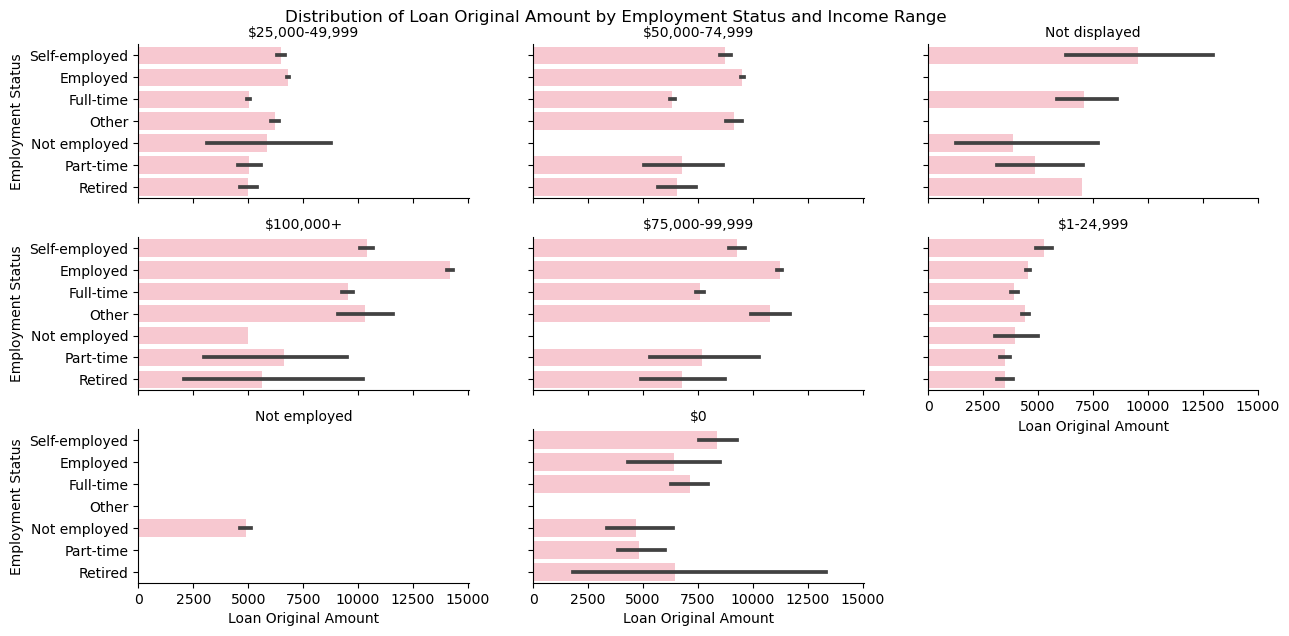

In [42]:

# Define the order for the 'EmploymentStatus' categories
employment_status_order =['Self-employed', 'Employed', 'Full-time', 'Other',
      'Not employed', 'Part-time', 'Retired']
# FacetGrid with barplot and specified order
grid = sns.FacetGrid(data=df, col='IncomeRange', col_wrap=3, col_order=IncomeRange_order)
grid.map(sns.barplot, 'LoanOriginalAmount', 'EmploymentStatus', color='pink', order=employment_status_order)
grid.set_titles("{col_name}")
grid.set_axis_labels('Loan Original Amount', 'Employment Status')
plt.suptitle('Distribution of Loan Original Amount by Employment Status and Income Range', y=1.02)
grid.figure.set_size_inches(14, 6)


Individuals who are either "Employed" or "Self-employed" tend to be associated with higher Loan Original Amounts compared to those who are "Not employed" in almost all income ranges groups .  
The varying patterns across the Income Range subplots imply that there is an interaction effect between Employment Status and Income Range on Loan Original Amounts. In other words, the impact of Employment Status on loan amounts may be different for borrowers with different income levels.

#### **Relationships and Interactions Observed**

Key Findings:  
The analysis reveals a complex interplay between the loan variables. While expected positive correlations exist, such as between loan amount and monthly payment, other relationships are more surprising. For instance, the Debt-to-Income Ratio negatively correlates with most other loan variables, including Loan Original Amount, LP_CustomerPrincipalPayments, and MonthlyLoanPayment. This unexpected finding contrasts with the intuition that higher income would generally correlate with larger loan amounts. 

<a id=Conclusions><a/>
## Conclusions
The comprehensive exploratory data analysis on the loan dataset has revealed several important insights that can inform future decision-making and analysis:

*Univariate Exploration:*  
- The majority of the loan entries have verifiable income.  
- The distribution of Loan Original Amounts and LP_CustomerPrincipalPayments variable is highly right-skewed.
    
*Bivariate Exploration*  
- There is a positive relationship between the Monthly Loan Payment and the Loan Original Amount.  
- The distribution of Loan Original Amounts varies across different loan status categories, with some exhibiting a wider range and more outliers than others.
   
*Multivariate Exploration:*  
- The pairplot reveals a mix of positive and negative associations between the loan variables and highlights the outliers .  
- The correlation matrix confirms the strong positive relationship between Loan Original Amount and Monthly Loan Payment, while the Debt-to-Income Ratio exhibits relatively weaker relationships with the other variables. 
- The analysis of Employment Status and Income Range suggests an interaction effect, where the impact of Employment Status on Loan Original Amounts may differ for borrowers with different income levels.  

The insights gained from this comprehensive EDA provide a solid foundation for understanding the loan dataset and its characteristics. These findings can inform feature engineering, model development, and decision-making processes related to loan management and risk assessment. By continuing to explore the data and address the identified outliers and relationships, researchers, and practitioners can leverage this information to enhance their understanding of the loan market and make more informed, data-driven decisions.